In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 330
R = 0.07
I = 1
mu_0 = 1.26*10**-6


def B_kort_spole(x):
    return (N*mu_0*I)/(2*R)*(1+x**2/R**2)**-1.5


x = np.linspace(-0.2, 0.2, 41)

dick_kort_spole = {'x': [], 'B': []}

for i in x:
    dick_kort_spole['x'].append(i)
    dick_kort_spole['B'].append(B_kort_spole(i))
df = pd.DataFrame(dick_kort_spole)

df.to_csv('kort_spole.csv', index=False)

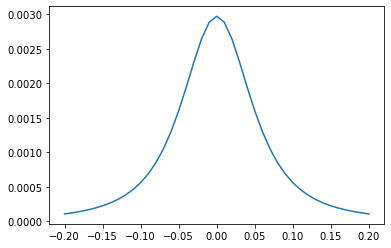

In [19]:
kort_spole = pd.read_csv('kort_spole.csv')

x = kort_spole['x']
B = kort_spole['B']

plt.figure(0)
plt.plot(x, B)
plt.savefig('ks_anal.pdf')
plt.show()

In [3]:
def B_Helmholtz(x, a):
    return N*mu_0*I/(2*R)*((1+(x-a/2)**2/R**2)**-1.5 + (1+(x+a/2)**2/R**2)**-1.5)


dick_Helmholtz = {'x': [], 'a=R/2': [], 'a=R': [], 'a=2R': []}
for i in x:
    dick_Helmholtz['x'].append(i)
    dick_Helmholtz['a=R/2'].append(B_Helmholtz(i, R/2))
    dick_Helmholtz['a=R'].append(B_Helmholtz(i, R))
    dick_Helmholtz['a=2R'].append(B_Helmholtz(i, 2*R))

df_Helmholtz = pd.DataFrame(dick_Helmholtz)
df_Helmholtz.to_csv('Helmholtz.csv', index=False)

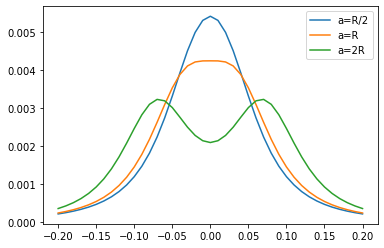

In [20]:
cont = pd.read_csv('Helmholtz.csv')
x = cont['x']
B1 = cont['a=R/2']
B2 = cont['a=R']
B3 = cont['a=2R']

plt.figure(1)
plt.plot(x, B1, label='a=R/2')
plt.plot(x, B2, label='a=R')
plt.plot(x, B3, label='a=2R')
plt.legend()
plt.savefig('H_anal.pdf')
plt.show()

In [5]:
def aHelmholtz(x, a):
    return N*mu_0*I/(2*R)*((1+(x-a/2)**2/R**2)**-1.5 - (1+(x+a/2)**2/R**2)**-1.5)


dick_aHelmholtz = {'x': [], 'a=R/2': [], 'a=R': [], 'a=2R': []}
for i in x:
    dick_aHelmholtz['x'].append(i)
    dick_aHelmholtz['a=R/2'].append(aHelmholtz(i, R/2))
    dick_aHelmholtz['a=R'].append(aHelmholtz(i, R))
    dick_aHelmholtz['a=2R'].append(aHelmholtz(i, 2*R))

df_aHelmholtz = pd.DataFrame(dick_aHelmholtz)
df_aHelmholtz.to_csv('aHelmholtz.csv', index=False)

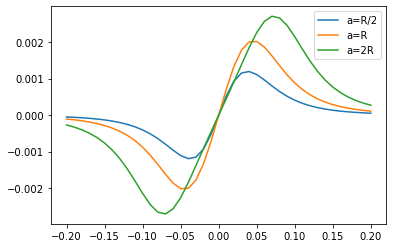

In [21]:
cont = pd.read_csv('aHelmholtz.csv')
x = cont['x']
B1 = cont['a=R/2']
B2 = cont['a=R']
B3 = cont['a=2R']

plt.figure(1)
plt.plot(x, B1, label='a=R/2')
plt.plot(x, B2, label='a=R')
plt.plot(x, B3, label='a=2R')
plt.legend()
plt.savefig('AH_anal.pdf')
plt.show()

In [36]:
l = 0.420
N = 397
R = 0.1
I = 1


def B_solenoide(z):
    costheta_1 = z/((z**2 + R**2)**.5)
    costheta_2 = -(l-z)/(((l-z)**2 + R**2)**.5)
    return (costheta_1 - costheta_2)*mu_0*I*N/(2*l)


z = np.linspace(-0.10, 0.60, 100)
dick_solenoide = {'z': [], 'B': []}
for i in z:
    dick_solenoide['z'].append(i)
    dick_solenoide['B'].append(B_solenoide(i))

df_solenoide = pd.DataFrame(dick_solenoide)
df_solenoide.to_csv('solenoide.csv', index=False)

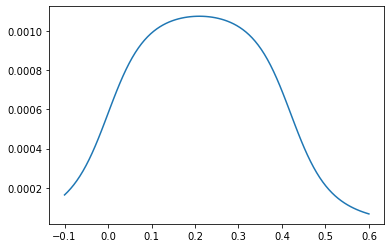

In [37]:
cont = pd.read_csv('solenoide.csv')
x = cont['z']
B = cont['B']

plt.figure(2)
plt.plot(z, B_solenoide(z))
plt.savefig('S_anal.pdf')
plt.show()

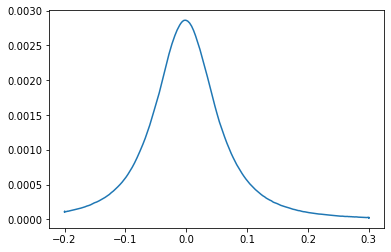

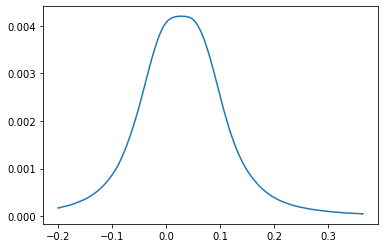

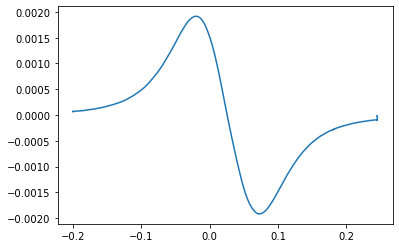

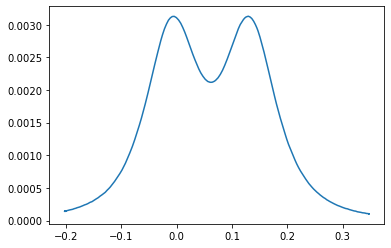

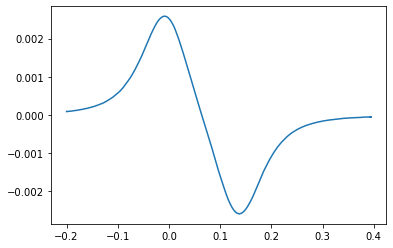

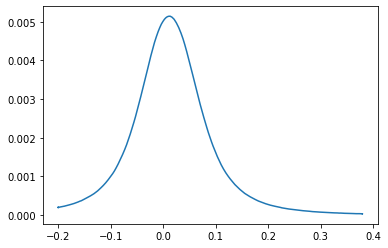

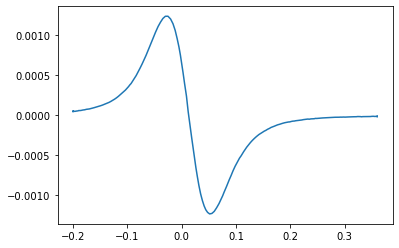

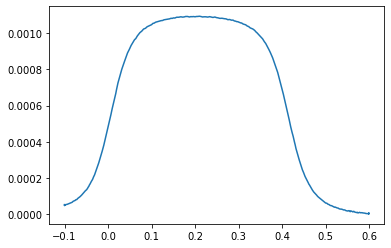

In [18]:
file = 'data/rest_data.xlsx'
data = pd.read_excel(file)

# x = np.linspace(0, 0.5, len(B))
# plt.figure(0)
# plt.plot(x, B)
# plt.show()

for i, k in zip(['ks', 'HR', 'AHR', 'H2R', 'AH2R', 'H.5R', 'AH.5R', 'S'], [0.1 if j==7 else 0.2 for j in range(8)]):
    x = data[f'x_{i}']
    B = data[f'B_{i}']
    plt.plot(x[::2] - k, B[::2])
    plt.savefig(i + '.pdf')
    plt.show()